In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import sys
sys.path.append("../scripts/")
from clean_data import DataCleaner

cleaner = DataCleaner()

In [24]:
clean_df = pd.read_csv('../data/cleaned_tel_data.csv', index_col=0)

In [25]:
clean_df

,Start,Start_ms,End,End_ms,Dur._(ms),IMSI,MSISDN/Number,IMEI,Last_Location_Name,Avg_RTT_DL_(ms),...,Youtube_DL_(Bytes),Youtube_UL_(Bytes),Netflix_DL_(Bytes),Netflix_UL_(Bytes),Gaming_DL_(Bytes),Gaming_UL_(Bytes),Other_DL_(Bytes),Other_UL_(Bytes),Total_UL_(Bytes),Total_DL_(Bytes)
Bearer_Id,,,,,,,,,,,,,,,,,,,,,
"13,114,483,460,844,900,352.00",2019-04-04 12:01:00,770.00,2019-04-25 14:35:00,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9.16456699548519E+015,42.00,...,"15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00"
"13,114,483,482,878,900,224.00",2019-04-09 13:04:00,235.00,2019-04-25 08:15:00,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,65.00,...,"20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00"
"13,114,483,484,080,500,736.00",2019-04-09 17:42:00,1.00,2019-04-25 11:58:00,652.00,"1,361,762.00","208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,45.00,...,"19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00"
"13,114,483,485,442,799,616.00",2019-04-10 00:31:00,486.00,2019-04-25 07:36:00,171.00,"1,321,509.00","208,201,402,342,131.00","33,750,343,200.00","35,356,610,164,913.00",T21824A,45.00,...,"21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00","43,324,218.00","846,028,530.00"
"13,114,483,499,480,700,928.00",2019-04-12 20:10:00,565.00,2019-04-25 10:40:00,954.00,"1,089,009.00","208,201,401,415,120.00","33,699,795,932.00","35,407,009,745,539.00",D88865A,45.00,...,"15,259,380.00","18,962,873.00","17,124,581.00","415,218.00","527,707,248.00","3,529,801.00","550,709,500.00","13,910,322.00","38,542,814.00","569,138,589.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"7,277,825,670,196,679,680.00",2019-04-29 07:28:00,451.00,2019-04-30 06:02:00,214.00,"81,230.00","208,202,201,200,072.00","33,650,688,697.00","35,483,109,451,938.00",D20434A,32.00,...,"16,191,667.00","11,763,428.00","17,883,703.00","19,678,161.00","526,609,673.00","9,197,207.00","3,264,510.00","13,487,416.00","57,628,851.00","574,175,259.00"
"7,349,883,264,234,609,664.00",2019-04-29 07:28:00,483.00,2019-04-30 10:41:00,187.00,"97,970.00","208,201,908,153,249.00","33,663,449,963.00","35,660,508,296,467.00",D10223C,27.00,...,"13,877,234.00","8,288,284.00","19,350,146.00","21,293,148.00","626,893,062.00","4,735,033.00","712,180,387.00","2,457,758.00","39,135,081.00","666,648,844.00"
"13,114,483,573,367,300,096.00",2019-04-29 07:28:00,283.00,2019-04-30 10:46:00,810.00,"98,249.00","208,201,711,161,187.00","33,621,890,103.00","35,721,209,870,907.00",T51102A,43.00,...,"22,660,510.00","1,855,903.00","9,963,942.00","5,065,760.00","553,539,484.00","13,394,316.00","121,100,856.00","11,314,729.00","34,912,224.00","592,786,405.00"


### Task 1

Top 10 Handsets

In [26]:
#The Top 10 Handset Manufacturers used by customers

handset_counts = clean_df['Handset_Type'].value_counts()
top_10_handsets = handset_counts.head(10)

print("Top 10 handsets : ")
print(top_10_handsets)

Top 10 handsets : 
Handset_Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


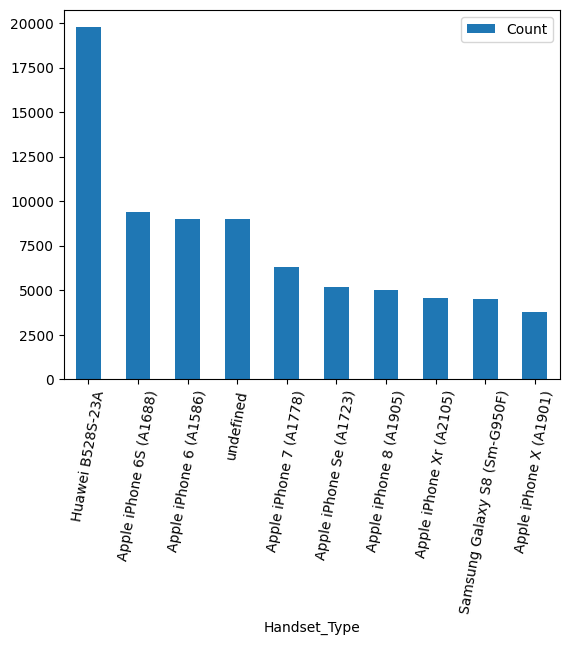

In [34]:
value_counts = clean_df['Handset_Type'].value_counts()[:10]
top_10_handsets = value_counts.index.tolist()


top_10_df = value_counts.to_frame(name='Count') 

top_10_df.plot(kind='bar', rot=80)
plt.show() 


Top 3 Handset Manufaturers

In [37]:
#Top 3 handset Manufacturers 

handset_manufacturer=clean_df['Handset_Manufacturer'].value_counts()
top_3_handset_manufacturers=handset_manufacturer.head(3)

print("The top 3 handset manufacturers ")
print(top_3_handset_manufacturers)

The top 3 handset manufacturers 
Handset_Manufacturer
Apple      60137
Samsung    40839
Huawei     34423
Name: count, dtype: int64


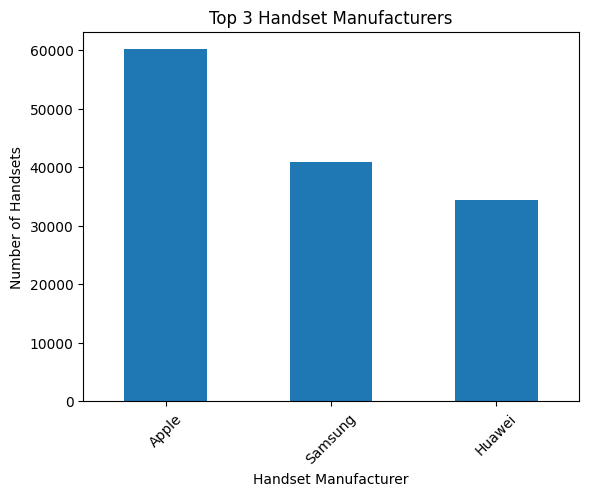

In [40]:
handset_manufacturer = clean_df['Handset_Manufacturer'].value_counts()
top_3_handset_manufacturers = handset_manufacturer.head(3)

# Create bar chart
top_3_handset_manufacturers.plot(kind='bar', rot=45)
plt.xlabel("Handset Manufacturer")
plt.ylabel("Number of Handsets")
plt.title("Top 3 Handset Manufacturers")
plt.show()



Top 5 Handsets per Top 3 Handset Manufacturers

In [43]:
# The Top 5 handsets per Top 3 Handset Manufacturers
top_3_handset_manufacturers = handset_manufacturer.head(3).index
filtered_df = clean_df[clean_df['Handset_Manufacturer'].isin(top_3_handset_manufacturers)]
columns_of_interest=['Handset_Manufacturer', 'Handset_Type']

top_handsets_per_manufacturer = filtered_df.groupby(columns_of_interest).size().reset_index(name='count')
top_handsets_per_manufacturer = top_handsets_per_manufacturer.sort_values(by=['Handset_Manufacturer', 'count'], descending=[True, False])
top5_handsets_per_manufacturer = top_handsets_per_manufacturer.groupby('Handset_Manufacturer').head(5)

print("Top 5 Handsets per Top 3 Handset Manufacturers and their counts")
print(top5_handsets_per_manufacturer)

Top 5 Handsets per Top 3 Handset Manufacturers and their counts
    Handset_Manufacturer                    Handset_Type  count
35                 Apple         Apple iPhone 6S (A1688)   9419
31                 Apple          Apple iPhone 6 (A1586)   9023
41                 Apple          Apple iPhone 7 (A1778)   6326
55                 Apple         Apple iPhone Se (A1723)   5187
48                 Apple          Apple iPhone 8 (A1905)   4993
83                Huawei                Huawei B528S-23A  19752
104               Huawei                    Huawei E5180   2079
183               Huawei  Huawei P20 Lite Huawei Nova 3E   2021
182               Huawei                      Huawei P20   1480
224               Huawei                  Huawei Y6 2018    997
359              Samsung    Samsung Galaxy S8 (Sm-G950F)   4520
242              Samsung      Samsung Galaxy A5 Sm-A520F   3724
292              Samsung     Samsung Galaxy J5 (Sm-J530)   3696
284              Samsung     Samsung Gal